# 6.5: Unsupervised Machine Learning: Clustering

### This script contains the following:
#### 1. Importing libraries and data
#### 2. Cleaning of data
#### 3. The elbow technique
#### 4. k-means clustering

## 1. Importing libraries and data

In [15]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy
import folium
import json
import geopandas
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans 
import pylab as pl 
from sklearn.preprocessing import StandardScaler

In [18]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [21]:
#define path for superstore_project
path = r'C:/users/localadmin/global_superstore_project'

In [24]:
#importing procesed superstore data as gs_store
gs_store = pd.read_csv(os.path.join(path,'Data', 'processed_data', 'superstore_cleaned.csv'))

## 2. Cleaning of data

In [43]:
#checking the dataframe's shape
gs_store.head()

,Unnamed: 0,product_category,city,country,customer_id,customer_name,discount,market,order_date,order_id,...,sales,segment,ship_date,ship_mode,shipping_cost,state,sub_category,year,market2,week_num
0,0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,00:00.0,CA-2011-130813,...,19,Consumer,00:00.0,Second Class,4.37,California,Paper,2011,North America,2
1,1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,00:00.0,CA-2011-148614,...,19,Consumer,00:00.0,Standard Class,0.94,California,Paper,2011,North America,4
2,2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,00:00.0,CA-2011-118962,...,21,Consumer,00:00.0,Standard Class,1.81,California,Paper,2011,North America,32
3,3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,00:00.0,CA-2011-118962,...,111,Consumer,00:00.0,Standard Class,4.59,California,Paper,2011,North America,32
4,4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,00:00.0,CA-2011-146969,...,6,Consumer,00:00.0,Standard Class,1.32,California,Paper,2011,North America,40


In [31]:
# Checking the dataframe's columns
gs_store.columns

Index(['Unnamed: 0', 'product_category', 'city', 'country', 'customer_id',
       'customer_name', 'discount', 'market', 'order_date', 'order_id',
       'order_priority', 'product_id', 'product_name', 'profit', 'quantity',
       'region', 'row_id', 'sales', 'segment', 'ship_date', 'ship_mode',
       'shipping_cost', 'state', 'sub_category', 'year', 'market2',
       'week_num'],
      dtype='object')

In [36]:
#checking the dataframe's shape
gs_store.shape

(51290, 27)

In [46]:
# Check for missing values
gs_store.isnull().sum() #no missing values

Unnamed: 0          0
product_category    0
city                0
country             0
customer_id         0
customer_name       0
discount            0
market              0
order_date          0
order_id            0
order_priority      0
product_id          0
product_name        0
profit              0
quantity            0
region              0
row_id              0
sales               0
segment             0
ship_date           0
ship_mode           0
shipping_cost       0
state               0
sub_category        0
year                0
market2             0
week_num            0
dtype: int64

In [128]:
# Selection of the necessary columns, identify them as 'columns'

columns = ["sales","profit","shipping_cost","discount"]

In [130]:
columns

['sales', 'profit', 'shipping_cost', 'discount']

In [132]:
# Creating a subset of gs_store made up of the 'columns'
df = gs_store[columns]

In [134]:
df.head()

,sales,profit,shipping_cost,discount
0,19,9.3312,4.37,0.0
1,19,9.2928,0.94,0.0
2,21,9.8418,1.81,0.0
3,111,53.2608,4.59,0.0
4,6,3.1104,1.32,0.0


## 3. Elbow technique

In [136]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [138]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-13919808632.770908,
 -6713848216.753264,
 -4450397364.679005,
 -3347012019.207938,
 -2629598631.176239,
 -2217532233.1403093,
 -1953181585.1210084,
 -1678448147.061922,
 -1529247550.511414]

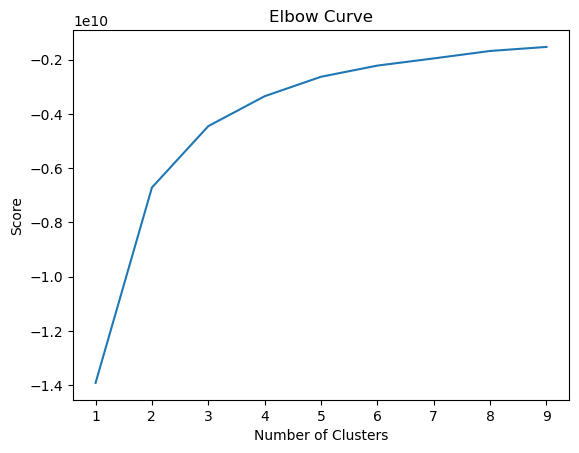

In [140]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The curve flattens after 5. This implies that the optimal number of clusters is 4.

## 4. K-Means clustering

In [143]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [88]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=5)

In [145]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\LocalAdmin\AppData\Local\Temp\ipykernel_10136\1645658811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.fit_predict(df)


In [147]:
df.head()

,sales,profit,shipping_cost,discount,clusters
0,19,9.3312,4.37,0.0,0
1,19,9.2928,0.94,0.0,0
2,21,9.8418,1.81,0.0,0
3,111,53.2608,4.59,0.0,0
4,6,3.1104,1.32,0.0,0


In [149]:
#checking the number of values per each cluster
df['clusters'].value_counts()

clusters
0    43251
3     6605
1     1328
2      106
Name: count, dtype: int64

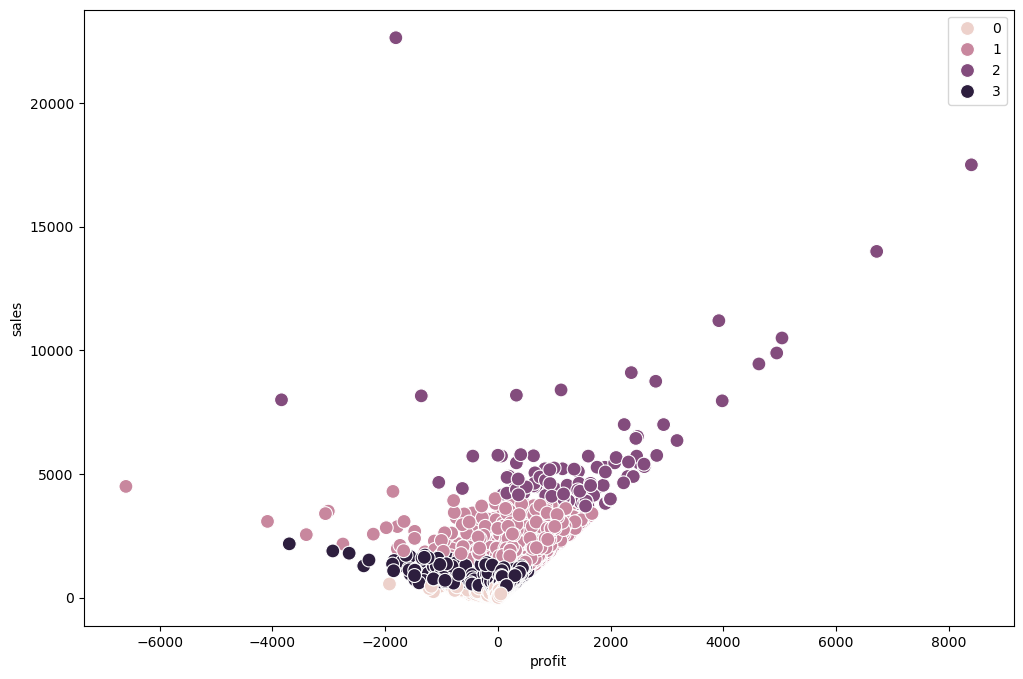

In [151]:
# Plot the clusters for the "profit" and "sales" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['profit'], y=df['sales'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('profit') # Label x-axis.
plt.ylabel('sales') # Label y-axis.
plt.show()

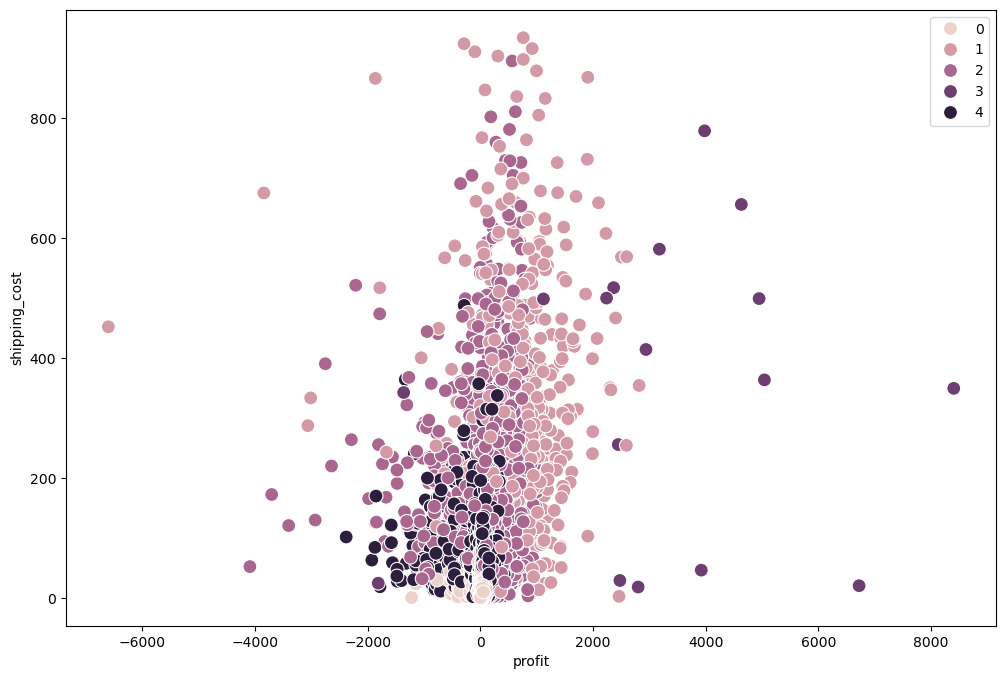

In [108]:
# Plot the clusters for the "profit" and "shipping_cost" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['profit'], y=df['shipping_cost'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('profit') # Label x-axis.
plt.ylabel('shipping_cost') # Label y-axis.
plt.show()

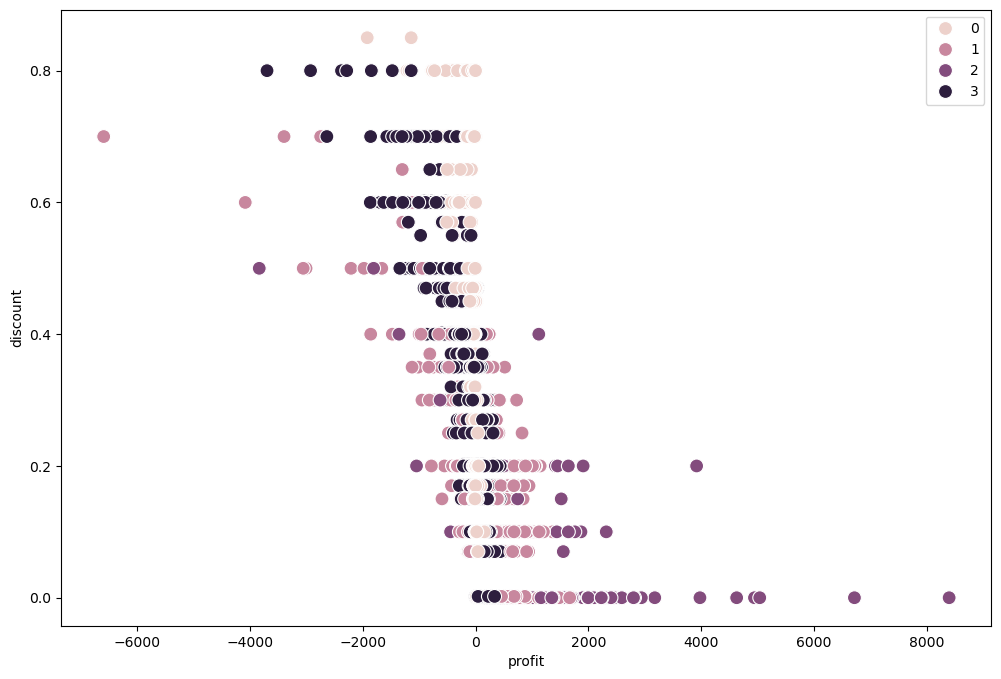

In [153]:
# Plot the clusters for the "profit" and "shipping_cost" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['profit'], y=df['discount'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('profit') # Label x-axis.
plt.ylabel('discount') # Label y-axis.
plt.show()

The clusters do not give much insight into this data as clusters do not convey objective and straightforward relationships. For example, as sales increase, profits also increase but the four clusters stretch from negative to positive profits. As for shipping cost, no distinct clusters are visible at all levels of shipping cost, making it not easy to distinctively pin meaning to the different clusters. Lastly, as much as discount lessens profit, the clusters generated make interpretation difficult as different cluster colors are represented at different levels of discount. 

In [157]:
# descritive statistics for the 4 clusters
df.loc[df['clusters'] == 3, 'cluster'] = 'dark pink'
df.loc[df['clusters'] == 2, 'cluster'] = 'pink'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 4, 'cluster'] = 'dark purple'

C:\Users\LocalAdmin\AppData\Local\Temp\ipykernel_10136\1803839116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['clusters'] == 3, 'cluster'] = 'dark pink'


In [161]:
df.groupby('cluster').agg({'sales':['mean', 'median'], 
                         'profit':['mean', 'median'], 
                         'shipping_cost':['mean', 'median'],
                          'discount':['mean', 'median']})

sales               profit            shipping_cost           \
                  mean  median         mean     median          mean   median   
cluster                                                                         
dark pink   739.856321   668.0    81.375374   106.5600     80.986931   63.770   
pink       5549.924528  4635.5  1430.389745  1399.6648    384.424010  374.785   
purple     2103.964608  1920.0   357.656517   381.7335    227.468799  185.526   

           discount         
               mean median  
cluster                     
dark pink  0.105171    0.0  
pink       0.061415    0.0  
purple     0.077937    0.0

The mean for sales, profit and shipping costs are the least when compared with other clusters. That the median is less than the mean (for the same variables) imply that the data has outliers, and the distribution is likely to have more values less than the mean. The same applies for the pink and purple clusters. The pink cluster has the highest mean profit, sales, and shipping cost.

#### usefulness of the results in future steps of an analytics pipeline

It might be insightful in figuring out the cluster that contributes the best to the profit of Globals Supertore so that action can be taken to maximize profits. This encompasses the level of discount and sales that can contribute to the maximization of profits.